In [1]:
using ModelingToolkit, OrdinaryDiffEq, DifferentialEquations,ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib ~/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42
┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42


In [2]:
using LinearAlgebra, SparseArrays, PyPlot, NNlib 

In [42]:
img = convert(Array{Float32,2}, load("../input_img/Iine_100_100_gs.png"));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);


In [43]:
tspan = (0.0f0, 100.0f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

In [44]:
# x_lgn = zeros(Float32, p.dim_i, p.dim_j)
# x_lgn = reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
# C = reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
# H_z = reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)

x_lgn = reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
C = reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)
H_z = reshape(Array{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K)


f = Laminart.MyFunction(x_lgn, C, H_z)

(::MEngProject.Laminart.MyFunction{Array{Float32,3}}) (generic function with 1 method)

In [45]:
prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Array{Float32,3} and tType Float32. In-place: true
timespan: (0.0f0, 100.0f0)
u0: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [46]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  5.01 GiB
  allocs estimate:  1790765
  --------------
  minimum time:     12.092 s (12.03% GC)
  median time:      12.092 s (12.03% GC)
  mean time:        12.092 s (12.03% GC)
  maximum time:     12.092 s (12.03% GC)
  --------------
  samples:          1
  evals/sample:     1

In [ ]:
img = convert(Array{Float32,2}, load("../input_img/Iine_100_100_gs.png"));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);

In [41]:
using CUDA, ModelingToolkit, OrdinaryDiffEq, DifferentialEquations,ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [ ]:
img = convert(CuArray{Float32,2}, load("./input_img/Iine_100_100_gs.png"));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);

In [ ]:
tspan = (0.0f0, 100.0f0)
u0 = reshape(CUDA.zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

In [ ]:
x_lgn = reshape(CuArray{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K);
C = reshape(CuArray{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K);
H_z = reshape(CuArray{Float32}(undef, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K);

In [ ]:
f = Laminart.MyFunction(x_lgn, C, H_z)
prob = ODEProblem(f, u0, tspan, p)
sol = solve(prob)

In [ ]:
@benchmark sol = solve(prob)

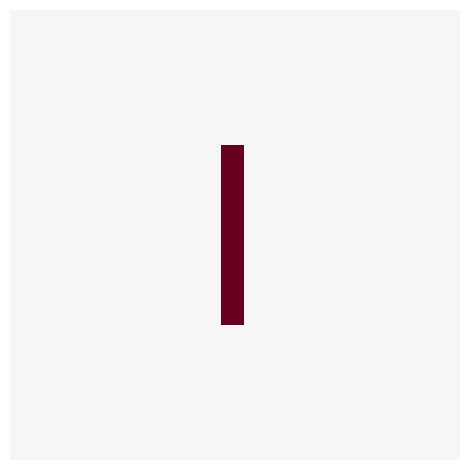

In [48]:
Utils.plot_rb(img)

In [50]:
k = Kernel.gaussian((2,0.05), (9,9))

9×9 OffsetArray(::Array{Float64,2}, -4:4, -4:4) with eltype Float64 with indices -4:4×-4:4:
 0.0  0.0  0.0  3.82378e-89  0.0276306  3.82378e-89  0.0  0.0  0.0
 0.0  0.0  0.0  9.17278e-89  0.0662822  9.17278e-89  0.0  0.0  0.0
 0.0  0.0  0.0  1.7137e-88   0.123832   1.7137e-88   0.0  0.0  0.0
 0.0  0.0  0.0  2.49342e-88  0.180174   2.49342e-88  0.0  0.0  0.0
 0.0  0.0  0.0  2.82541e-88  0.204164   2.82541e-88  0.0  0.0  0.0
 0.0  0.0  0.0  2.49342e-88  0.180174   2.49342e-88  0.0  0.0  0.0
 0.0  0.0  0.0  1.7137e-88   0.123832   1.7137e-88   0.0  0.0  0.0
 0.0  0.0  0.0  9.17278e-89  0.0662822  9.17278e-89  0.0  0.0  0.0
 0.0  0.0  0.0  3.82378e-89  0.0276306  3.82378e-89  0.0  0.0  0.0

In [53]:
img_n = reshape(img, 100,100,1,1);
k_n = reshape(k, 9,9,1,1)

9×9×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  3.82378e-89  0.0276306  3.82378e-89  0.0  0.0  0.0
 0.0  0.0  0.0  9.17278e-89  0.0662822  9.17278e-89  0.0  0.0  0.0
 0.0  0.0  0.0  1.7137e-88   0.123832   1.7137e-88   0.0  0.0  0.0
 0.0  0.0  0.0  2.49342e-88  0.180174   2.49342e-88  0.0  0.0  0.0
 0.0  0.0  0.0  2.82541e-88  0.204164   2.82541e-88  0.0  0.0  0.0
 0.0  0.0  0.0  2.49342e-88  0.180174   2.49342e-88  0.0  0.0  0.0
 0.0  0.0  0.0  1.7137e-88   0.123832   1.7137e-88   0.0  0.0  0.0
 0.0  0.0  0.0  9.17278e-89  0.0662822  9.17278e-89  0.0  0.0  0.0
 0.0  0.0  0.0  3.82378e-89  0.0276306  3.82378e-89  0.0  0.0  0.0

In [54]:
i_nn = NNlib.conv(img_n, k_n, pad=4)

┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float32
│   T2 = Float64
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97


100×100×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

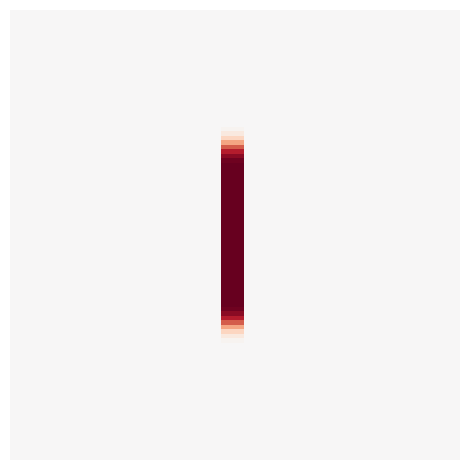

In [56]:
Utils.plot_rb(i_nn[:,:,1,1])

In [64]:
i_f = imfilter(img, reflect(k));

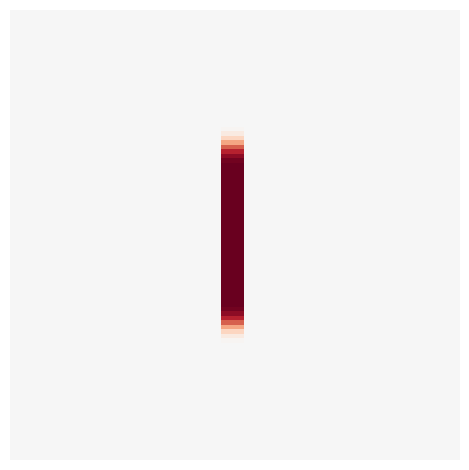

In [66]:
Utils.plot_rb(i_f, axMax=1.01)

In [68]:
i_nn ≈ i_f

true

In [69]:
findmax(abs.(i_nn-i_f))

(5.551115123125783e-16, CartesianIndex(67, 48, 1, 1))

In [71]:
const σ_1 = 1
const σ_2 = 0.5
const γ = 10;
const K = 12;

In [88]:
o_nn = reshape(zeros(100,200),100,100,2,1,1)

100×100×2×1×1 Array{Float64,5}:
[:, :, 1, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0

In [80]:
o_f = similar(img)

100×100 Array{Float32,2}:
   0.0           0.0         NaN           …   4.0729f-30    6.0f-45
   0.0           4.5799f-41    0.0             1.0f-45       6.0f-45
   1.5f-44      -5.21015f25   -5.21033f25      4.07293f-30   0.0
   0.0           4.5799f-41    4.5799f-41      1.0f-45       0.0
   0.0           3.0f-45       0.0             4.07295f-30   0.0
   0.0           6.0f-45       6.0f-45     …   1.0f-45       0.0
   1.5f-44      -5.5f-44       0.0             4.07297f-30   0.0
  -1.0f-44      -3.0f-45       0.0             1.0f-45       0.0
  -6.0f-45     NaN            -5.21033f25      4.073f-30     0.0
  -1.0f-45     NaN             4.5799f-41      1.0f-45       0.0
 NaN             0.0           0.0         …   4.07302f-30   3.0166f-27
  -1.5f-44       4.5799f-41    0.0             1.0f-45       4.58f-41
  -1.1f-44      -5.21016f25   -5.21035f25      4.07305f-30  -5.34108f25
   ⋮                                       ⋱                
 NaN             4.0f-45     NaN         

In [76]:
p.k_C_A[:, :, 1]

5×5 Array{Float32,2}:
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495

In [116]:
function fun_v_C!(
    v_C::AbstractArray,
    v_p::AbstractArray,
    v_m::AbstractArray,
    p::NamedTuple,
)
    V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0 / 8.0f0) * (max(v_p, 0) - max(v_m, 0))
    imfilter!(V, temp, centered(reshape(p.k_gauss_2),5,5,1,1), p.filling)

    A = similar(v_C)
    #     allocate B to v_C
    # @inbounds begin
        for k ∈ 1:p.K
            a = @view A[:, :, k]
            b = @view v_C[:, :, k]
            imfilter!(a, V, centered(reshape(p.k_C_A[:, :, k]),5,5,1,1), p.filling)
            imfilter!(b, V, centered(reshape(p.k_C_B[:, :, k]),5,5,1,1), p.filling)
        end
    # end
    @. v_C = p.γ * (max(A - abs(v_C), 0) + max(-A - abs(v_C), 0))
    return nothing
end

fun_v_C! (generic function with 1 method)

In [117]:
function fun_v_C!(
    v_C::AbstractArray,
    v_p::AbstractArray,
    v_m::AbstractArray,
    p::NamedTuple,
)
    V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0 / 8.0f0) * (max(v_p, 0) - max(v_m, 0))
    V = NNlib.conv(temp, reshape(collect(p.k_gauss_2),5,5,1,1), pad=2 )

    A = similar(v_C)
     B = similar(v_C)
    #     allocate B to v_C
    # @inbounds begin
        for k ∈ 1:p.K
       
            
           A[:, :, k] = NNlib.conv(V, reshape(collect(p.k_C_A[:, :, k]),5,5,1,1), pad=2)
            B[:, :, k] = NNlib.conv(V, reshape(collect(p.k_C_B[:, :, k]),5,5,1,1), pad=2)
        end
    # end
    @. v_C = p.γ * (max(A - abs(v_C), 0) + max(-A - abs(v_C), 0))
    return nothing
end

fun_v_C! (generic function with 1 method)

In [110]:
function fun_v_Ca!(
    v_C::AbstractArray,
    v_p::AbstractArray,
    v_m::AbstractArray,
    p::NamedTuple,
)
    V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0 / 8.0f0) * (max(v_p, 0) - max(v_m, 0))
    V = NNlib.conv(temp, reshape(collect(p.k_gauss_2),5,5,1,1), pad=2 )

    A = similar(v_C)
     B = similar(v_C)
    #     allocate B to v_C
    # @inbounds begin
        for k ∈ 1:p.K
       
            
           A[:, :, k] = NNlib.conv(V, reshape(collect(p.k_C_A[:, :, k]),5,5,1,1), pad=2)
            B[:, :, k] = NNlib.conv(V, reshape(collect(p.k_C_B[:, :, k]),5,5,1,1), pad=2)
        end
    # end
    @. v_C = p.γ * (max(A - abs(v_C), 0) + max(-A - abs(v_C), 0))
    return nothing
end

fun_v_Ca! (generic function with 1 method)

In [111]:
fun_v_Ca!(
    o_nn,i_nn,-i_nn,p)

┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for 

In [118]:
fun_v_C!(
    o_nn,i_nn,-i_nn,p)

┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float64
│   T1 = Float64
│   T2 = Float32
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/conv.jl:97
┌ Warning: Slow fallback implementation invoked for 

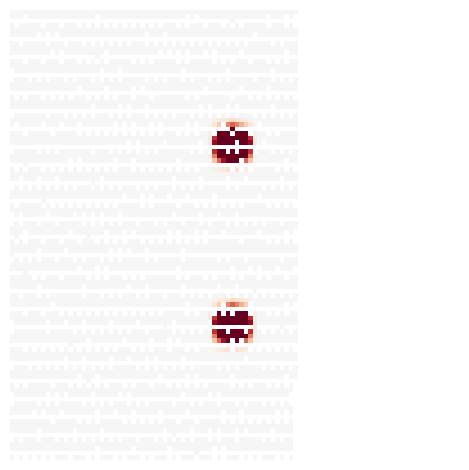

In [119]:
Utils.plot_rb(o_nn[:,:,2,1,1])

In [114]:
reshape(collect(p.k_C_A[:, :, 1]),5,5,1,1)

5×5×1×1 Array{Float32,4}:
[:, :, 1, 1] =
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495
 -0.12495  -0.0404873  0.0  0.0404873  0.12495

In [115]:
i_nn

100×100×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0